In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier

In [4]:
df = pd.read_csv('vectorized_data.zip')

In [6]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [29]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
x_train = scaler.fit_transform(x_train)

# Apply the StandardScaler ti the test data
x_test = scaler.transform(x_test)

In [39]:
# turn the grade class from 1-5 to 0-4
y_train = y_train - 1
y_test = y_test -1

In [40]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5) 
y_test = to_categorical(y_test, num_classes=5)

In [41]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [55]:
from tensorflow.keras.layers import BatchNormalization
# define vars
input_num_units = 40
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 5

epochs = 10
batch_size = 128

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_initializer='he_normal'),
 BatchNormalization(),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='sigmoid'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [56]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10


2023-03-15 11:33:04.650428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1033/1033 [==============================] - ETA: 0s - loss: 0.9937 - accuracy: 0.5238

2023-03-15 11:33:20.544961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1033/1033 [==============================] - 19s 18ms/step - loss: 0.9937 - accuracy: 0.5238 - val_loss: 2.4530 - val_accuracy: 0.2967
Epoch 2/10
1033/1033 [==============================] - 17s 17ms/step - loss: 0.9711 - accuracy: 0.5374 - val_loss: 3.2576 - val_accuracy: 0.5239
Epoch 3/10
1033/1033 [==============================] - 18s 18ms/step - loss: 0.9647 - accuracy: 0.5409 - val_loss: 2.8379 - val_accuracy: 0.5236
Epoch 4/10
1033/1033 [==============================] - 19s 18ms/step - loss: 0.9564 - accuracy: 0.5479 - val_loss: 2.5908 - val_accuracy: 0.5238
Epoch 5/10
1033/1033 [==============================] - 17s 17ms/step - loss: 0.9488 - accuracy: 0.5534 - val_loss: 2.0646 - val_accuracy: 0.5238
Epoch 6/10
1033/1033 [==============================] - 36s 35ms/step - loss: 0.9415 - accuracy: 0.5579 - val_loss: 2.2822 - val_accuracy: 0.5238
Epoch 7/10
1033/1033 [==============================] - 28s 27ms/step - loss: 0.9325 - accuracy: 0.5637 - val_loss: 2.1153 - val_accura

In [57]:
trained_model_5d.history

{'loss': [0.993684709072113,
  0.9711074829101562,
  0.9646531939506531,
  0.9563586115837097,
  0.9487910270690918,
  0.9414964914321899,
  0.9325059652328491,
  0.923591136932373,
  0.9132431745529175,
  0.9009702801704407],
 'accuracy': [0.5237500667572021,
  0.5374134182929993,
  0.540918231010437,
  0.5478596687316895,
  0.5533552765846252,
  0.5579274296760559,
  0.5637106895446777,
  0.5679951310157776,
  0.5736194849014282,
  0.5793270468711853],
 'val_loss': [2.453030824661255,
  3.2576351165771484,
  2.837879180908203,
  2.590801239013672,
  2.0645554065704346,
  2.282172918319702,
  2.115337371826172,
  2.2932589054107666,
  1.8841845989227295,
  2.6492600440979004],
 'val_accuracy': [0.29666635394096375,
  0.5238668322563171,
  0.5236397385597229,
  0.5238441228866577,
  0.5238441228866577,
  0.5237759947776794,
  0.5238668322563171,
  0.5238441228866577,
  0.5238441228866577,
  0.5238214135169983]}

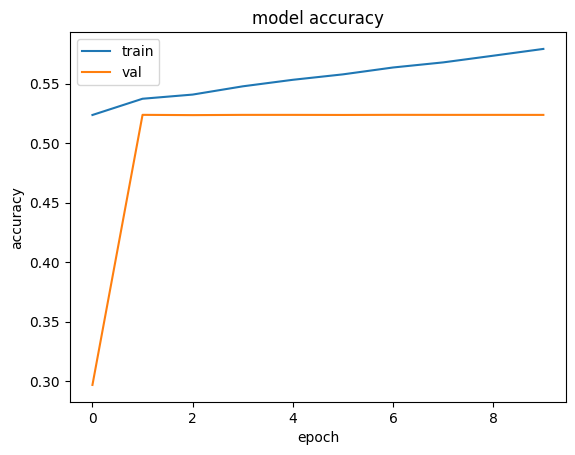

In [58]:
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1]:
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5


2023-03-13 21:32:26.514828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 128s 157ms/step - loss: 4.8338 - accuracy: 0.0601
Epoch 2/5
782/782 [==============================] - 118s 150ms/step - loss: 4.6046 - accuracy: 0.0738
Epoch 3/5
782/782 [==============================] - 117s 150ms/step - loss: 4.2792 - accuracy: 0.0912
Epoch 4/5
782/782 [==============================] - 117s 150ms/step - loss: 3.8742 - accuracy: 0.1315
Epoch 5/5
782/782 [==============================] - 127s 162ms/step - loss: 3.6090 - accuracy: 0.1702
